#1. Downloading Libraries

In [ ]:
!pip install ultralytics==8.3.19
!pip install supervision[assets]==0.24.0

#2. Import packages

In [ ]:
from ultralytics import YOLO
import ultralytics
import numpy as np
import matplotlib.pyplot as plt
import cv2

#3. Load the pretrained model

In [ ]:
model = YOLO('yolo11x.pt')

#4. Loading the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#5. Plot out the result for testing the pre-trained model



image 1/1 /content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample.jpg: 448x640 2 broccolis, 4 carrots, 285.2ms
Speed: 17.8ms preprocess, 285.2ms inference, 1559.8ms postprocess per image at shape (1, 3, 448, 640)


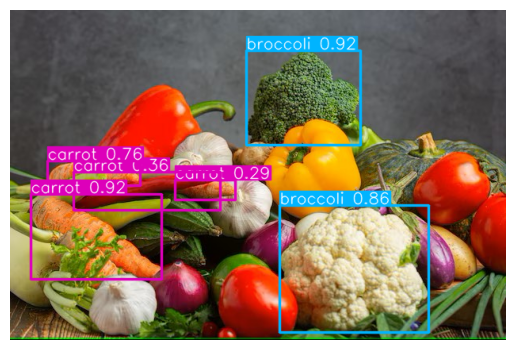

In [ ]:
result2 = model.predict(r'/content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample.jpg')
img= result2[0].plot()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample2.jpeg: 608x640 1 broccoli, 1 carrot, 92.3ms
Speed: 3.2ms preprocess, 92.3ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


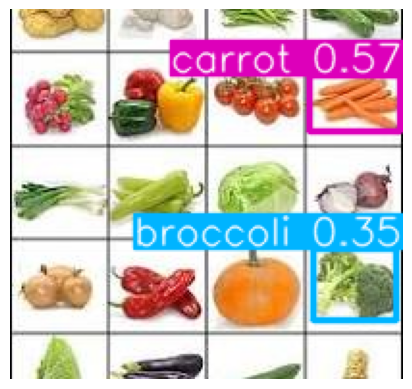

In [ ]:
result2 = model.predict(r'/content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample2.jpeg')
img= result2[0].plot()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample3.jpeg: 608x640 1 carrot, 87.8ms
Speed: 2.4ms preprocess, 87.8ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 640)


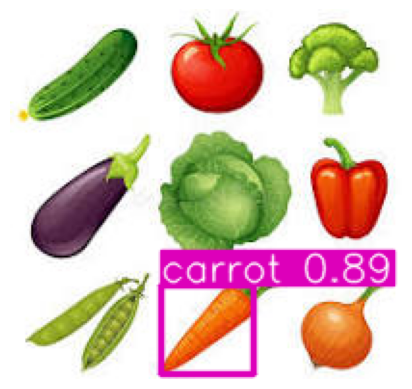

In [ ]:
result2 = model.predict(r'/content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample3.jpeg')
img= result2[0].plot()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.axis('off')
plt.show()

#6. Print Model Architecture

In [ ]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x C3k(
            (cv1): Conv(
              (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv3

#7. Downloading Custom custom dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rYYrihtdUZlwfmsPm3XU")
project = rf.workspace("gnu-e7cmw").project("vegetables-eyyop")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vegetables-5 in yolov11:: 100%|██████████| 7918/7918 [00:03<00:00, 2053.63it/s]


#8. Training with custom dataset

In [ ]:
results= model.train(data=r'/content/vegetables-5/data.yaml',
                     epochs=30,
                     imgsz=240,
                     augment=True,
                     shear=0.0,
                     flipud=0.0,
                     fliplr=0.5,
                     )

New https://pypi.org/project/ultralytics/8.3.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/vegetables-5/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 74.8MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytic

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 174MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[240] must be multiple of max stride 32, updating to [256]


train: Scanning /content/vegetables-5/train/labels... 2829 images, 211 backgrounds, 0 corrupt: 100%|██████████| 2829/2829 [00:02<00:00, 1113.86it/s]

train: WARNING ⚠️ /content/vegetables-5/train/images/Image_105_jpeg.rf.cad4bccebc6c456c8745bec4432db265.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/vegetables-5/train/images/Image_107_jpg.rf.d712bb2ec249311d2e3bc61a66283cb5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/vegetables-5/train/images/Image_17_jpg.rf.58b73c323f41ad9e70ad51a7a60d3680.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/vegetables-5/train/images/Image_4_jpg.rf.1e2ccb662b4f4d96c15816f0a6e4ebe1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/vegetables-5/train/images/Image_56_jpeg.rf.ea2e93493afbdef5766f77a76ceb7fc1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/vegetables-5/train/images/Image_83_jpg.rf.03b3f8d714ea51d92712fe914446f255.jpg: 1 duplicate labels removed


train: New cache created: /content/vegetables-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4207, len(boxes) = 6322. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/vegetables-5/valid/labels... 745 images, 61 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:01<00:00, 390.86it/s]


val: New cache created: /content/vegetables-5/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1016, len(boxes) = 1541. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.47G      1.582       2.74      1.751         50        256: 100%|██████████| 177/177 [00:59<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.66it/s]

                   all        745       1541      0.554      0.589      0.602      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.93G      1.158      1.418      1.388         42        256: 100%|██████████| 177/177 [00:56<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]


                   all        745       1541      0.618      0.678      0.685      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.96G      1.089      1.264      1.323         51        256: 100%|██████████| 177/177 [00:53<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]

                   all        745       1541      0.638      0.706       0.68      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.95G      1.051      1.199      1.289         57        256: 100%|██████████| 177/177 [00:53<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]


                   all        745       1541      0.705      0.766      0.757       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.96G      1.005      1.154      1.264         49        256: 100%|██████████| 177/177 [01:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.52it/s]

                   all        745       1541      0.681      0.763      0.741      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.95G     0.9909      1.077      1.247         49        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]

                   all        745       1541      0.712      0.736      0.758      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.93G     0.9552      1.057      1.231         75        256: 100%|██████████| 177/177 [00:53<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        745       1541      0.723      0.757      0.778       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.95G     0.9517      1.015      1.222         58        256: 100%|██████████| 177/177 [00:52<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        745       1541      0.691      0.778      0.767      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.97G     0.9335     0.9821      1.207         35        256: 100%|██████████| 177/177 [00:54<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]

                   all        745       1541      0.733       0.76      0.786      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.96G      0.912       0.94      1.187         53        256: 100%|██████████| 177/177 [00:53<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]

                   all        745       1541      0.764       0.75      0.783      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.93G     0.9046     0.9276      1.176         48        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.74it/s]

                   all        745       1541      0.727      0.784      0.809      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.95G     0.8646     0.8895      1.159         67        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.79it/s]

                   all        745       1541      0.745       0.74      0.798      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.96G     0.8811     0.8797      1.172         60        256: 100%|██████████| 177/177 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        745       1541      0.753      0.786      0.821      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.96G     0.8628     0.8505      1.157         63        256: 100%|██████████| 177/177 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.19it/s]

                   all        745       1541      0.784      0.765      0.818      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.92G     0.8502      0.835      1.156         62        256: 100%|██████████| 177/177 [00:51<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.22it/s]

                   all        745       1541      0.763      0.772      0.811      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.95G     0.8387      0.831      1.146         65        256: 100%|██████████| 177/177 [00:52<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.43it/s]

                   all        745       1541      0.772      0.797      0.829      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.97G     0.8505      0.817      1.147         49        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.80it/s]

                   all        745       1541      0.761      0.784      0.823      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.96G     0.8125     0.7959       1.13         58        256: 100%|██████████| 177/177 [00:52<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.59it/s]

                   all        745       1541      0.754      0.805      0.824       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.93G     0.8046     0.7709      1.127         54        256: 100%|██████████| 177/177 [00:52<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.34it/s]

                   all        745       1541      0.744      0.824      0.828      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.95G     0.7953     0.7478      1.122         53        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]

                   all        745       1541      0.777      0.784      0.831      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.96G      0.689     0.6505       1.06         26        256: 100%|██████████| 177/177 [00:53<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]

                   all        745       1541      0.775      0.761      0.817      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.96G     0.6777     0.6152      1.054         35        256: 100%|██████████| 177/177 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.93it/s]

                   all        745       1541      0.782      0.782      0.833      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.93G     0.6687     0.5952      1.047         25        256: 100%|██████████| 177/177 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]

                   all        745       1541      0.742      0.829      0.831      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.96G     0.6641      0.575      1.045         18        256: 100%|██████████| 177/177 [00:51<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.58it/s]

                   all        745       1541      0.758      0.813      0.831       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.95G     0.6442     0.5574      1.034         20        256: 100%|██████████| 177/177 [00:51<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]

                   all        745       1541      0.791      0.769      0.823      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.96G     0.6342     0.5376      1.026         35        256: 100%|██████████| 177/177 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.08it/s]

                   all        745       1541      0.778      0.813      0.836      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.93G     0.6214     0.5124      1.018         36        256: 100%|██████████| 177/177 [00:52<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]

                   all        745       1541       0.81      0.791      0.832      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.96G     0.6145     0.4923      1.009         42        256: 100%|██████████| 177/177 [00:52<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.37it/s]

                   all        745       1541      0.782       0.81      0.835      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.96G     0.5897     0.4894     0.9983         38        256: 100%|██████████| 177/177 [00:51<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]

                   all        745       1541      0.796      0.797      0.835      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.95G     0.5897     0.4718      0.991         28        256: 100%|██████████| 177/177 [00:51<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.80it/s]

                   all        745       1541       0.78      0.807      0.836      0.668



30 epochs completed in 0.583 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]


                   all        745       1541      0.805      0.788       0.84      0.666
                 apple         60        178      0.886      0.938      0.947      0.939
                carrot         56        181      0.713      0.564      0.623      0.428
              cucumber         56        119      0.741      0.756      0.736      0.524
                   egg         67        208      0.891      0.822      0.913      0.625
                 onion         71        138      0.813       0.82      0.893      0.711
                pepper        152        161      0.961      0.975      0.984      0.775
                potato         58        213      0.624      0.731      0.751      0.718
          slice-cheeze         28         46      0.802      0.703      0.804      0.629
                  spam         71        151      0.819      0.777      0.904      0.648
                tomato         65        146      0.799      0.795      0.843      0.664
Speed: 0.1ms preproce

lr/pg0,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▃▃▆▅▆▆▆▆▆▇▇▇▇▇█████▇███▇█████
metrics/mAP50-95(B),▁▃▃▅▄▅▆▅▆▆▇▆▇▇▇▇▇▇▇█▇█████████
metrics/precision(B),▁▃▃▅▄▅▆▅▆▇▆▆▆▇▇▇▇▆▆▇▇▇▆▇▇▇█▇██
metrics/recall(B),▁▄▄▆▆▅▆▇▆▆▇▅▇▆▆▇▇▇█▇▆▇██▆█▇▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁


# 9. Deploy custom trained model using image and plot it


image 1/1 /content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample.jpg: 448x640 2 broccolis, 2 carrots, 80.3ms
Speed: 2.9ms preprocess, 80.3ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


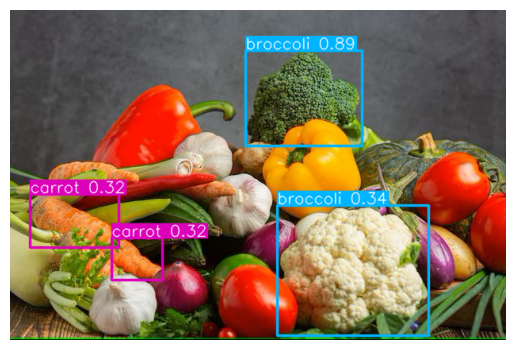

In [ ]:
model_custom = YOLO( r'/content/yolo11n.pt')
result= model_custom(source = r"/content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample.jpg")

img= result[0].plot()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.axis('off')
plt.show()

# 10. Deploy custom trained model using image and upload it (Another example)



image 1/1 /content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample2.jpeg: 608x640 1 broccoli, 1 carrot, 73.4ms
Speed: 2.7ms preprocess, 73.4ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


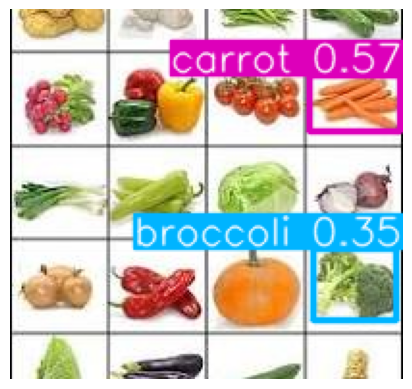

In [ ]:
model_custom = YOLO( r'/content/yolo11x.pt')
result= model_custom(source = r'/content/drive/MyDrive/Trimester5/CV/Lab/Hackathon/Part2/sample2.jpeg')

img= result[0].plot()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.axis('off')
plt.show()